In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.9MB/s 


In [3]:
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pd.set_option('max_colwidth', 180)

In [4]:
df = pd.read_csv("/content/xiaomi2019.csv", sep=";", encoding="ISO-8859-1")
df.head()

,tweet,sentiment
0,pake hp xiaomi bisa kan,Positive
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      101 non-null    object
 1   sentiment  101 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


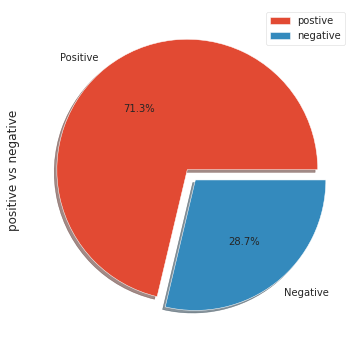

In [6]:
df["sentiment"].value_counts().plot(kind="pie", explode=[0, 0.1], figsize=(6,6), autopct="%1.1f%%", shadow=True)
plt.ylabel("positive vs negative")
plt.legend(["postive", "negative"])
plt.show()

In [30]:
df["length"]=df["tweet"].apply(len)
df.head()

,tweet,sentiment,length,tweetWords,num
0,pake hp xiaomi bisa kan,Positive,23,"[pake, hp, xiaomi, bisa, kan]",5
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive,80,"[Xiaomi, yi, action, kamera, bagus, juga, buat, video, bisa, di, jadikan, pertimbangan, nihhh]",13
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive,92,"[Ya, Allah, jauhkanlah, aku, dari, godaan, clickbait, line, today, dan, berita-berita, di, browser, xiaomi]",14
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive,309,"[hpmu, opo, se?, kok, sawangane, jernih, koyok, iph, â, Xiaomi, euy:', https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWD...",13
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive,91,"[numpang, nanya, itu, hapenya, xiaomi, bukan, ya?, Kalo, iya, tipe, apa?, Jernih, kameranya, mirip, iphone]",15


In [58]:
# del df["num"]
arr = df["tweet"].to_numpy()
def getWordCount(tweet):
  wordCount = list(map(len, tweet.split()))
  return wordCount
result = map(getWordCount, arr)
df["wordCount"]=list(result)
df.head()
# list(result)

,tweet,sentiment,length,wordCount
0,pake hp xiaomi bisa kan,Positive,23,"[4, 2, 6, 4, 3]"
1,Xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh,Positive,80,"[6, 2, 6, 6, 5, 4, 4, 5, 4, 2, 7, 12, 5]"
2,Ya Allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi,Positive,92,"[2, 5, 10, 3, 4, 6, 9, 4, 5, 3, 13, 2, 7, 6]"
3,hpmu opo se? kok sawangane jernih koyok iph â Xiaomi euy:' https://lap78.ask.fm/igoto/45DKECPW7B667HQMHN2IG6NM7SOD5OAUS7QPPAN4D7ROV45V2Q24OJAMGBFM2RRQK2272FYJJNWDWXQVYYU5Y25C...,Positive,309,"[4, 3, 3, 3, 9, 6, 5, 3, 3, 6, 5, 244, 3]"
4,numpang nanya itu hapenya xiaomi bukan ya? Kalo iya tipe apa? Jernih kameranya mirip iphone,Positive,91,"[7, 5, 3, 7, 6, 5, 3, 4, 3, 4, 4, 6, 9, 5, 6]"


In [59]:
df["tweetLength"] = df["tweet"].apply(len)
df["tweetLength"].describe()

count    101.00000
mean      76.80198
std       56.98895
min        7.00000
25%       36.00000
50%       60.00000
75%       99.00000
max      309.00000
Name: tweetLength, dtype: float64

In [61]:
def clean_text(text):
  text=text.lower()
  text=re.sub("@[^\s]+", "", text)
  text=re.sub("\w*\d\w", "", text)
  text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', "", text)
  text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', "", text)
  text=re.sub("#[^\s]+", "", text)
  text=re.sub(r'\b[a-zA-Z]\b', "", text)
  return text

clean = lambda x: clean_text(x)

In [62]:
def Punctuation(string):
  punctuation='''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
  for x in string.lower():
    if x in punctuation:
      string = string.replace(x, "")

  return(string)

cleanPunc = lambda x: Punctuation(x)

In [63]:
dfx=pd.DataFrame(df.tweet.apply(clean))
dfx

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan berita-berita di browser xiaomi
3,hpmu opo se? kok sawangane jernih koyok iph â xiaomi euy:' ==â â¦
4,numpang nanya itu hapenya xiaomi bukan ya? kalo iya tipe apa? jernih kameranya mirip iphone
...,...
96,xiaomi bagus ka hehe
97,baru tahu kalo xiaomi bisa screen record wkwkwk
98,bgst mau nanya disini ada yg xiaomi mi ya susah cari sinyal ga semenjak update ke patch juni ?
99,"hp aku gitu dulu xiaomi, tapi ga sampe ke konter ku cari di google alhamdulillah bisa itu siapa tau bootlop nder kalo bootlop gausah ke konter:( sayang uangnya."


In [64]:
dfx=pd.DataFrame(dfx.tweet.apply(cleanPunc))
dfx.head()

,tweet
0,pake hp xiaomi bisa kan
1,xiaomi yi action kamera bagus juga buat video bisa di jadikan pertimbangan nihhh
2,ya allah jauhkanlah aku dari godaan clickbait line today dan beritaberita di browser xiaomi
3,hpmu opo se kok sawangane jernih koyok iph â xiaomi euy â â¦
4,numpang nanya itu hapenya xiaomi bukan ya kalo iya tipe apa jernih kameranya mirip iphone


In [65]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords=open(stopwordsfile, 'r')
  row= file_stopwords.readline()
  while row:
    word=row.strip()
    stopwords.append(word)
    row=file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
stop_words_indo=get_stopword("/content/drive/MyDrive/temp/stopwordsindo.txt")

In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
def stopwords(text):
  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil=' '.join(filtered)
  return hasil

st=lambda x: stopwords(x)

In [70]:
dfx = pd.DataFrame(dfx.tweet.apply(st))
dfx.head()

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadikan pertimbangan nihhh
2,ya allah jauhkanlah godaan clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph â xiaomi euy â â¦
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kameranya iphone


In [71]:
def stemming(text):
  factory_stem=StemmerFactory()
  stemmer=factory_stem.create_stemmer()
  text=stemmer.stem(text)
  return text

stem = lambda x: stemming(x)

In [72]:
dfx = pd.DataFrame(dfx.tweet.apply(stem))
dfx.head()

,tweet
0,pake hp xiaomi
1,xiaomi yi action kamera bagus video jadi timbang nihhh
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi
3,hpmu opo sawangane jernih koyok iph xiaomi euy
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone


In [73]:
dfx["sentiment"]=df["sentiment"]
dfx

,tweet,sentiment
0,pake hp xiaomi,Positive
1,xiaomi yi action kamera bagus video jadi timbang nihhh,Positive
2,ya allah jauh goda clickbait line today beritaberita browser xiaomi,Positive
3,hpmu opo sawangane jernih koyok iph xiaomi euy,Positive
4,numpang nanya hapenya xiaomi ya kalo iya tipe jernih kamera iphone,Positive
...,...,...
96,xiaomi bagus ka hehe,Positive
97,kalo xiaomi screen record wkwkwk,Positive
98,bgst nanya yg xiaomi mi ya susah cari sinyal ga semenjak update patch juni,Negative
99,hp gitu xiaomi ga sampe konter ku cari google alhamdulillah tau bootlop nder kalo bootlop gausah konter sayang uang,Negative


In [74]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents="ascii")

In [120]:
y=dfx.sentiment
X=dfx.tweet

In [121]:
X_v=vectorizer.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [123]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect=vectorizer.transform(X_test)

mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)
y_pred = mnb.predict(X_test_vect)

accuracy_score(y_test, y_pred)

0.6774193548387096

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
print(confusion_matrix(y_test, y_pred))

[[ 0 10]
 [ 0 21]]


In [126]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        10
    Positive       0.68      1.00      0.81        21

    accuracy                           0.68        31
   macro avg       0.34      0.50      0.40        31
weighted avg       0.46      0.68      0.55        31



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
print("MNB")
scores_accuracy_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_mnb.mean(), scores_accuracy_mnb.std()))

scores_precision_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_mnb.mean(), scores_precision_mnb.std()))

scores_recall_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_mnb.mean(), scores_recall_mnb.std()))

scores_f1_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_mnb.mean(), scores_f1_mnb.std()))

MNB
Rata-rata nilai akurasi: 0.71 (+/- 0.03)
Rata-rata nilai precision macro: 0.36 (+/- 0.02)
Rata-rata nilai recall macro: 0.50 (+/- 0.00)
Rata-rata nilai f1 macro: 0.42 (+/- 0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr